In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
import math

    A warning. We will not be covering any one algorithm in the utmost depth, nor will we be supplying the underlying math behind the algorithms. I suggest that you treat these classes as a introductory lesson into the algorithms, and that understanding the math behind the algorithms is something that you will have to do in your own time. 

# Let's start our Machine Learning adventure with the first type of algorithm, Regression Algorithms

#### Regression is a type of supervised learning, where we are given some training set, and we are expected to create some type of function that can predict some continous valued output. 

Let's start by defining some of the key components of the algorithm that we are going to be going over.

#### m is going to represent the size of our training data. 
#### x(s) is going to represent our input variable(s) /feature(s). 
#### y is going to represent the output variable.
#### (x,y) is going to represent one training example.
#### ($x^{(i)}$,$y^{(i)}$) is going to represent any $i^{th}$ training example

# Let's also work to define our problem and solution.

    Our training set is going to teach some Learning algorithm to develop a hypothesis.
    This hypothesis is going to take in some value (x), and then output some estimated value of y. 
    Why is it called hypothesis? It's a relic of the past, something used long ago, and because no one has bothered to change it, it has stuck around

# Let's take a step back and try to imagine what the best linear predictor is

    We are trying to find the equation of a line that minimizes the distance between the line and the sum of the differences
    of all the points.

   Let's use a slightly altered name for the equation of a line. We are used to seeing y = mx + b, but here in Machine Learning
   Land we are going to be using $\theta$

$h_{\theta}(x)$ = $\theta_{0} + \theta_{1}x$

This is the equation of the line. Now we have to think of what our "game plan is". How can we tell what the line of best fit?
What is some quantifiable measure that we could get in order to say that one line is objectively better than the other?
Well, we can use the distance between each point and the line. The difference between the predicted value(provided by plugging in our x's  into our function) and the actual value. Let's write a formal equation for this.

$Y_{true}-Y_{predicted}$ 

This is our starting point, but we are not done. What is the issue generated by this?
Yes, values will be both positive AND negative, and so they will cancel each other out. We don't want this to happen,
so what can we do to solve this?

$(Y_{true}-Y_{predicted})^{2}$ 

Good, we can square it, and now everything will become positive. 

This is called a Loss function.

A loss function is a function that is going to be optimized so that we can APPROACH the value that we need.

# Loss vs Cost

While they are used interchangebly, they are not the same thing.  The Loss function is the function at a singular point,
while the cost function is the average over the entire data set.

$(Y_{true}-Y_{predicted})^{2}$ is our Loss function, commonly refered to as L2 Loss or MSE Loss,

while our COST function is $J_{(\theta_0,\theta_1)} = \frac{1}{m}\sum\limits_{i=1}^{m}(Y_{true}^{(i)}-Y_{predicted}^{(i)})^{2}$ 

# Let's take a whole step back before we get into any more craziness to understand all of the different things we are introducing.

$\textbf{hypothesis: }$ $h_{\theta}(x)$ = $\theta_{0} + \theta_{1}x$

What we are saying is that a good predictor is going to be a line that best fits the set. That is where we get our hypothesis. It is the equation of a line.
<br>
<br>
<br>
$\textbf{Parameters: }$ $\theta_{0},\theta_{1}$
<br>
Next we are defining our parameters. The values that we are going to try to fine tune to get a "better line"
<br>
<br>
<br>
$\textbf{Cost function: }$ $J_{(\theta_0,\theta_1)} = \frac{1}{m}\sum\limits_{i=1}^{m}(Y_{true}^{(i)}-Y_{predicted}^{(i)})^{2}$
<br>
This cost function defines a measure that we can use to see whether or not our line is a good fit. We are going
to get the mean sum of the squared errors between our hypothesis and the values provided from our training set.
<br>
<br>
<br>

$\textbf{Goal: }$ $minimize_{\theta0,\theta1}$  $J(\theta0,\theta1)$
<br>
Now we can add our goal. Our line of best fit would be to pick the two values that minimize the MSE function. 


# Let's get some intuition with the goal by visually seeing our goal in action.

$\textbf{hypothesis: }$ $h_{\theta}(x) = \theta_{1}x$

Let's get some intution of what we did. We set the value of $\theta_{0}$ to zero. What does this mean in terms of our original
equation? Yes, this means that the line of best fit HAS to run through the origin point.

$\textbf{Parameters: }$ $\theta_{1}$

We are going to force the line to pass through the origin point, just as a proof of concept.

$\textbf{Cost function: }$ $J_{(\theta_1)} = \frac{1}{m}\sum\limits_{i=1}^{m}(Y_{true}^{i}-Y_{predicted}^{i})^{2}$

Our cost function is going to updated, but in a more nuanced way. Our Y predicted changes.

$\textbf{Cost function: }$ $J_{(\theta_1)} = \frac{1}{m}\sum\limits_{i=1}^{m}(y^{(i)}-h_{\theta}x^{(i)})^{2}$

This is a rewritten cost function, substituting the ypredicted with our hypothesis, and the Y True with the value of Y at the ith point.

$\textbf{Cost function: }$ $J_{(\theta_1)} = \frac{1}{m}\sum\limits_{i=1}^{m}(y^{(i)}-\theta_{1}x^{(i)})^2$

Taken even 1 step further as a rewrite, this is the cost function with the line of best fit being forced to pass through the
origin

$\textbf{Cost function: }$ $J_{(\theta_1)} = \frac{1}{2m}\sum\limits_{i=1}^{m}(y^{(i)}-\theta_{1}x^{(i)})^2$

FINALLY we are also going to multiply the MSE by a constant 1/2. This is simply to make the math easier to do. Remember
multiplying and or dividing by a constant should yield no real change, as the same constant is going to be applied to all cases.

In [4]:
# Let's create a graph that show lines with different slopes that pass through the origin

In [4]:
training_set_x= [0,1,2,3]
training_set_y=[0,1,2,3]


In [29]:
#When we set theta1 equal to 1, this is the output we get.
line_of_best_fit_1 = [0,1,2,3]

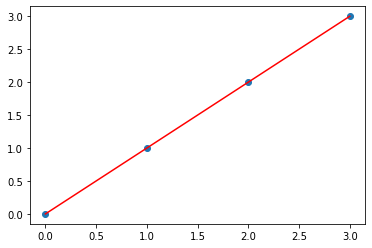

In [35]:
plt.scatter(training_set_x,training_set_y)
plt.plot(line_of_best_fit_1,[0,1,2,3],color='red')

Let's calculate the MSE by hand of this line.
$\textbf{Cost function: }$ $J_{(\theta_1)} = \frac{1}{2m}\sum\limits_{i=1}^{m}(y^{(i)}-\theta_{1}x^{(i)})$

In [25]:
# 1/2m * ((1-1) + (2-2) + (3-3))^2
# We get zero here. This is a good start.



#When theta is 1 the MSE is 0.
#What about when theta is 0?

# 1/2m * ((1-0)^2 + (2-0)^2 + (3-0)^2))
# (1 + 4 + 9) = 15
# 1/6 * 15
# 
# Our MSE is 2.5

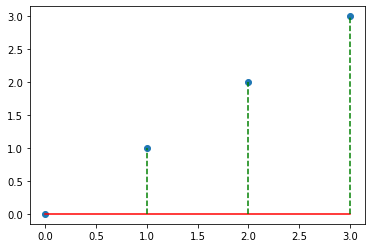

In [11]:
plt.scatter(training_set_x,training_set_y)
plt.plot(training_set_x,[0,0,0,0],color='red')
plt.vlines([1,2,3],[0,0,0],[1,2,3],color='green',linestyle='dashed')

In [ ]:
#Here is the way that we can show the error lines generated. This is not necessarily a strict 
#programmatic way to implement the error lines, we would need to build a data pipeline to pipe the 
#error lines, but we're not going to implement that at the moment.

In [ ]:
#Now, let's try a different line to see if that one will fit.


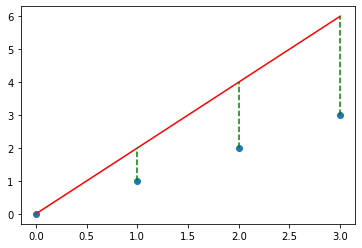

In [13]:
plt.scatter(training_set_x,training_set_y)
plt.plot(training_set_x,[0,2,4,6],color='red')
plt.vlines([1,2,3],[1,2,3],[2,4,6],color='green',linestyle='dashed')

In [ ]:
# We can see that this line of fit, is ABOVE the 
# the training points
#Let's calculate the MSE in this case.
# 1/6((2-1)^2+(4-2)^2+(6-3)^2)
# 1 + 4 + 9
# 15
# Here we can see, that when theta is equal to 2, our MSE is 15. 
#So let's get a look at what the function of the MSE looks like.


In [ ]:
# We should get a parabola.

In [ ]:
# At what point in the parabola does the MSE become the smallest?
# Yes! At the minimum of the parabola. The lowest point. Remember, height corresponds to the value of the MSE.


In [ ]:
#How can we form a way to get to the minimum of the cost function? Is there something that can give us some amount
#of information that tells us how to approach the minimum?

In [11]:
#We can use calculus to do some tricks. The answer is to compute the derivative of theta, and then use that to 
#update the function by the derivative.


# Update Rules
$\theta_{1} := \theta_{1}-\alpha\frac{d}{d\theta_1}$


# What is ALPHA?

    Alpha is called our learning rate. It is a scalar that we can apply to our derivative. It changes the rate of change
    of our theta function, and so when alpha is large, our gradient descent learns "faster". If it's too large, it might
    diverge, and never find the optima, but if it's too small, it can take too long to converge. So tuning alpha
    is something we might need to do depending on our algorithm.

# Full Derivative

$\frac{d}{d\theta_{1}}J(\theta_{1})$ = $\frac{1}{m}\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)}) * x^{(i)}$

# Let's write our gradient descent function.

    What are we going to need? A set of X's and Y's. We are going to need to set alpha. We are going to need to set a starting theta (usually it's 0), We are going to need to define convergence.




# What is convergence?

    In the gradient descent function, we would in an ideal world try to get the derivative equal to zero. Why is that?
    If the derivative is zero, that means that it has to be the minimum, as the slope of the tangent line is a flat line.
    This would be the guaranteed optima, but this is extremely difficult to reach. We are happy enough with an approximation
    of this value, so we have to set tolerances.

In [241]:
training_set_x = [1,2,3]
training_set_y = [1,2,3]



In [242]:
cost_function_of_MSE(training_set_x,training_set_y,theta)

NameError: name 'cost_function_of_MSE' is not defined

In [243]:
def gradient_descent(x,y,alpha,tolerance,iterations,theta=0):
        i = 0
        list_of_thetas = []
        list_of_thetas.append(theta)
        
        
        
        while i < iterations:
            
            avg = 1/(len(x))
            sum_of_MSE = 0
            #Calculate average of the derivative
            
            
            
            for counter,value in enumerate(x):
                sum_of_MSE += (((theta * x[counter]) - y[counter])*x[counter])
            
            
            
            #Update new_theta    
            new_theta =  theta - (alpha * avg * sum_of_MSE)
            list_of_thetas.append(new_theta)
            
            if abs(theta-new_theta) < tolerance:
                
                
                return new_theta,list_of_thetas
                
            
            theta = new_theta
            
            i+=1
            
            
        return new_theta,list_of_thetas
        

In [244]:
gradient_descent(training_set_x,training_set_y,0.01,0.00000001,1000)

(0.9999998022741614,
 [0,
  0.04666666666666666,
  0.09115555555555555,
  0.1335682962962963,
  0.17400177580246912,
  0.2125483595983539,
  0.24929610281709738,
  0.2843289513522995,
  0.3177269336225255,
  0.34956634338680764,
  0.37991991402875663,
  0.40885698470741466,
  0.436443658754402,
  0.46274295467919657,
  0.48781495012750076,
  0.5117169191215507,
  0.5345034628958784,
  0.5562266346274041,
  0.5769360583447919,
  0.5966790422887016,
  0.6155006869818955,
  0.6334439882560737,
  0.6505499354707903,
  0.6668576051488201,
  0.6824042502418751,
  0.6972253852305876,
  0.7113548672531602,
  0.7248249734480128,
  0.7376664746871056,
  0.749908705868374,
  0.7615796329278499,
  0.7727059167245502,
  0.7833129739440712,
  0.7934250351600145,
  0.8030652001858805,
  0.8122554908438727,
  0.8210169012711587,
  0.8293694458785046,
  0.837332205070841,
  0.8449233688342018,
  0.8521602782886057,
  0.8590594653018041,
  0.8656366902543866,
  0.8719069780425153,
  0.8778846524005313,


In [ ]:
# This is great! We have now written the equation for gradient Descent. There is an issue with this implmentation though.
# Can anyone tell me what that issue is?

In [ ]:
#Yes, the issue here is that we are forcing the y intercept to be zero. This won't always be the case. 
#How can we incorporate the gradient descent algorithm for any y intercept?


# Linear Regression using MSE

    Let's break away from our naive approach and now fully build out the formula.
    Let's get back to our original cost function.

$\textbf{Cost function: }$ $J_{(\theta_0,\theta_1)} = \frac{1}{m}\sum\limits_{i=1}^{m}(Y_{true}^{(i)}-Y_{predicted}^{(i)})^{2}$

In [104]:
#Let's change a few things around

$\textbf{Cost function: }$ $J_{(\theta_0,\theta_1)} = \frac{1}{2m}\sum\limits_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{(i)}))^{2}$

In [106]:
#Let's add back in that constant 2 to make it easier to work with, and let's substitue our y_true and y_predicted.

In [107]:
#Remember, we need to get the derivative of this function in order to start gradient descent.


In [ ]:
#Now that we have 2 theta's we need 2 partial derivatives.

 # Parial derivative of $\theta_{1}$

$\frac{\partial}{\partial_{\theta_{1}}}J(\theta_{0},\theta_{1})$ = $\frac{1}{m}\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)}) * x^{(i)}$

    Nothing changes here, the math is moved around a bit. There are two factors in this function, so it's now the partial
    derivative instead of the derivative of the function, which is why we use a different symbol.

# Partial Derivative of $\theta_{0}$

$\frac{\partial}{\partial_{\theta_{0}}}J(\theta_{0},\theta_{1})$ = $\frac{1}{m}\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})$

    When we derive the partial derivative of this, there is no constant x, so there is no need to multiply by x,
    remember our cost hypothesis
    

$\textbf{hypothesis: }$ $h_{\theta}(x)$ = $\theta_{0} + \theta_{1}x$

# The only difference we need to make, is to make sure that we are updating both theta 0 and theta 1

In [1]:
def gradient_descent(x,y,alpha,tolerance,iterations,theta_0=0,theta_1=0):
        i = 0
        list_of_theta_0s = [0]
        list_of_theta_1s = [0]
        old_total_error = 1
        list_of_errors = []
        
        avg = 1/(len(x))
        while i < iterations:   
            
            
            #Calculate average of the partial derivative of theta_0  
            sum_of_MSE_theta_0 = 0                  
            for counter,value in enumerate(x):
                sum_of_MSE_theta_0 += ( (theta_0 + (theta_1*x[counter])) - y[counter])
                 
            
            #Calculate average of the partial derivative of theta_1    
            sum_of_MSE_theta_1 = 0                  
            for counter,value in enumerate(x):
                sum_of_MSE_theta_1 += (((theta_0 +(theta_1* x[counter])) - y[counter]) *   x[counter]   ) 
            
            
            
            
            #Update the value of theta_0
            new_theta_0 =  theta_0 - ((alpha * avg) * sum_of_MSE_theta_0)
            list_of_theta_0s.append(new_theta_0)
            
            #Update the value of theta_1
            new_theta_1 =  theta_1 - ((alpha * avg) * sum_of_MSE_theta_1)
            list_of_theta_1s.append(new_theta_1)
            
            
            
            total_error = sum([(theta_0 + (theta_1*x[i]) - y[i])**2 for i in range(len(x))])
            list_of_errors.append(total_error)
            if abs(total_error-old_total_error) <= tolerance:
                return new_theta_0,new_theta_1,list_of_theta_0s,list_of_theta_1s,list_of_errors,i
            old_total_error = total_error
            theta_0 = new_theta_0
            theta_1 = new_theta_1
            i+=1
            
            
        return new_theta_0,new_theta_1,list_of_theta_0s,list_of_theta_1s,list_of_errors,i
        

In [246]:
x_grad = [2,4,6,8,10,12,14,16,18,20] 
y_grad = [5,7,9,11,13,15,17,19,21,23]

In [247]:
theta_0,theta_1,list_of_theta_0s,list_of_theta_1s,list_of_errors,iteration_count = gradient_descent(x_grad,y_grad,0.01,0.0001,10000000)

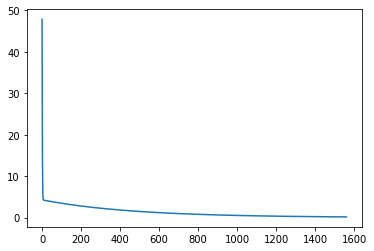

In [248]:
plt.plot([i for i in range(len(list_of_errors))],[math.sqrt(x) for x in list_of_errors])

# This code is great! it's extremely accurate, but it's cost intensive. One way to get around this is by using something called Stochastic Gradient Descent. Our update cycle is changed. Instead of updating after computing the means, it updates after every single point (chosen randomly). This helps speed up the program because it's less computationally expensive, but the noise helps us get around local minima

In [61]:
import random

def stochastic_gradient_descent(x,y,alpha,tolerance,iterations,theta_0=0,theta_1=0):
        i = 0
        list_of_theta_0s = [0]
        list_of_theta_1s = [0]
        grabber = random.randint(0,len(x)-1)
        old_total_error = (theta_0 + (theta_1*x[grabber]) - y[grabber])**2
        list_of_errors = [old_total_error]
        while i < iterations:   
            
            #grab random mapped X,Ys
            
            grabber = random.randint(0,len(x)-1)
            
            #Calculate average of the partial derivative of theta_0  
      
            MSE_of_theta_0 = (theta_0 + (theta_1*x[grabber])) - y[grabber]
                 
            
            #Calculate average of the partial derivative of theta_1    
            MSE_of_theta_1 = (( (theta_0 +(theta_1* x[grabber])) - y[grabber])) *  x[grabber]   
            
            
            
            
            #Update the value of theta_0
            new_theta_0 =  theta_0 - (alpha * MSE_of_theta_0)
            list_of_theta_0s.append(new_theta_0)
            
            #Update the value of theta_1
            new_theta_1 =  theta_1 - (alpha * MSE_of_theta_1)
            list_of_theta_1s.append(new_theta_1)
            
            
            
            error = (new_theta_0 + (new_theta_1*x[grabber]) - y[grabber])**2
            list_of_errors.append(error)
            if abs(error-old_total_error) <= tolerance:
                return new_theta_0,new_theta_1,list_of_theta_0s,list_of_theta_1s,list_of_errors,i
            old_total_error = error
            theta_0 = new_theta_0
            theta_1 = new_theta_1

            i+=1
        return new_theta_0,new_theta_1,list_of_theta_0s,list_of_theta_1s,list_of_errors,i
        

In [62]:
x_grad = [2,4,6,8,10,12,14,16,18,20] 
y_grad = [5,7,9,11,13,15,17,19,21,23]

In [63]:
theta_0,theta_1,list_of_theta_0s,list_of_theta_1s,list_of_errors,iteration_count = stochastic_gradient_descent(x_grad,y_grad,0.01,0.00001,10000000)

In [64]:
list_of_errors

[361,
 4792.792900000002,
 7410.300105610003,
 5397.161323890628,
 793.6623587301893,
 48.77048127593058,
 86.04456799261148,
 34.1510890362675,
 13.554567238494565,
 8.694850459708844,
 41.470411872548716,
 2.2963414064814076,
 338.56086070508474,
 684.7764091127649,
 10089.432454566191,
 0.26740269709006403,
 1.1083000514611503,
 0.05033632385046451,
 0.00015734749543205815,
 1.5049404377260587,
 2.1634160737651054e-05,
 14.56452016115275,
 156.3637156030355,
 1416.6708997350618,
 33.69195507841094,
 65.93678702916148,
 0.002645489962899502,
 1.409610864455362,
 0.1492225404877166,
 62.00934110122034,
 8.872924192717683,
 6.355053145739975,
 182.807580778718,
 0.003171733675649078,
 0.36511315523770305,
 2.598171968776264,
 3.090153210936366,
 0.15407487539904977,
 0.14496905026296672,
 0.17724692677520346,
 51.234400742871884,
 7.412387948503297,
 5.641908851200576,
 2.724103358412568,
 0.732064402964257,
 0.03513219295595587,
 3.2000680659594587,
 2.8880614295284097,
 0.00714144005

In [65]:
running_avg = []
for counter,value in enumerate(list_of_errors):
    running_avg.append(math.sqrt(sum(list_of_errors[0:counter+1]))/(counter+1))
    


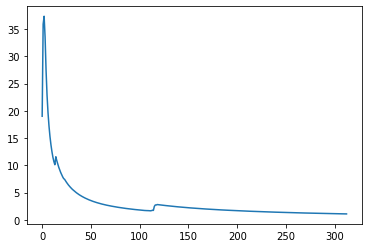

In [66]:
plt.plot([i for i in range(len(list_of_errors))],running_avg)

In [67]:
iteration_count

311

In [59]:
theta_0

3.2253127418402006

In [60]:
theta_1

0.9774683556954815

# This was Stochastic Gradient Descent with MSE as our Cost function. There are a few other cost functions, but the last one we can cover is Huber Loss.